In [1]:
import pandas as pd

df = pd.read_csv('output.csv')
df.drop(columns=["seed", "total_time"], inplace=True)

print(df.head())

  type  pk_amount  main_task_time  additional_task_time  mean_access_time  \
0   LC          2               0                     0          0.043976   
1   LC          2               0                     0          0.046735   
2   LC          2               0                     0          0.045630   
3   LC          2               0                  3000          0.047264   
4   LC          2               0                  3000          0.046499   

   accesses_amount  
0        332202.75  
1        312980.75  
2        320647.75  
3        309211.50  
4        314190.50  


In [2]:
df = df.groupby(["type", "pk_amount", "main_task_time", "additional_task_time"]).agg(["mean", "std"])
df

mean_access_time            \
                                                               mean       std   
type pk_amount main_task_time additional_task_time                              
AO   2         0              0                            0.023011  0.000437   
                              3000                         0.036609  0.000464   
                              6000                         0.061715  0.000977   
                              9000                         0.087246  0.000319   
                              12000                        0.113469  0.001298   
...                                                             ...       ...   
LC   300       21000          9000                       215.138079  2.746268   
                              12000                      209.783662  3.100899   
                              15000                      205.947646  5.547904   
                              18000                      203.980317  0.666871   
                              21000                      206.802283  2.647628   

                                                   accesses_amount  \
                                                              mean   
type pk_amount main_task_time additional_task_time                   
AO   2         0              0                      647904.333333   
                              3000                   408784.583333   
                              6000                   242753.000000   
                              9000                   171803.500000   
                              12000                  132128.000000   
...                                                            ...   
LC   300       21000          9000                       69.345556   
                              12000                      71.147778   
                              15000                      72.488333   
                              18000                      73.198333   
                              21000                      72.183889   

                                                                  
                                                             std  
type pk_amount main_task_time additional_task_time                
AO   2         0              0                     12725.921858  
                              3000                   5349.584110  
                              6000                   3890.874476  
                              9000                    653.247130  
                              12000                  1508.514646  
...                                                          ...  
LC   300       21000          9000                      0.939569  
                              12000                     1.021084  
                              15000                     2.042191  
                              18000                     0.243333  
                              21000                     0.925098  

[256 rows x 4 columns]

In [3]:
df_lc = df.loc['LC'].reset_index()
df_ao = df.loc['AO'].reset_index()
df_lc

pk_amount main_task_time additional_task_time mean_access_time            \
                                                              mean       std   
0           2              0                    0         0.045447  0.001388   
1           2              0                 3000         0.046758  0.000438   
2           2              0                 6000         0.074312  0.001154   
3           2              0                 9000         0.103781  0.000711   
4           2              0                12000         0.131614  0.001057   
..        ...            ...                  ...              ...       ...   
123       300          21000                 9000       215.138079  2.746268   
124       300          21000                12000       209.783662  3.100899   
125       300          21000                15000       205.947646  5.547904   
126       300          21000                18000       203.980317  0.666871   
127       300          21000                21000       206.802283  2.647628   

    accesses_amount               
               mean          std  
0     321943.750000  9676.312986  
1     312578.083333  2916.408025  
2     198728.166667  3083.019678  
3     142947.083333   916.881888  
4     112963.583333   980.952800  
..              ...          ...  
123       69.345556     0.939569  
124       71.147778     1.021084  
125       72.488333     2.042191  
126       73.198333     0.243333  
127       72.183889     0.925098  

[128 rows x 7 columns]

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
import numpy as np

def draw_plot(df_lc, 
              df_ao,
              lclabel: str,
              aolabel: str,
              pk_amount: int,
              title: str,
              xlabel: str,
              ylabel: str,
              zlabel: str,
              value: str,
              view1: int = 70,
              view2: int = 70
              ):
    # LOCKS
    df = df_lc[df_lc['pk_amount'] == pk_amount]

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111,
        projection='3d', 
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        zlabel=zlabel
    )
    ax.view_init(view1, view2)
    ax.zaxis.set_major_locator(LinearLocator(5))

    # Make data.
    X = df["main_task_time"].unique()
    xlen = len(X)
    Y = df["additional_task_time"].unique()
    ylen = len(Y)
    Z = [
        [
            (list(df.loc[(df['main_task_time'] == i) & (df['additional_task_time'] == j)][value]["mean"].values) or [0])[0]
            for i in X
        ] for j in Y 
    ]
    Z = np.array(Z)
    X,Y = np.meshgrid(X, Y)

    # Plot data
    locks = ax.plot_surface(X, Y, Z, color="red", label="locks")
    
    # AO
    df = df_ao[df_ao['pk_amount'] == pk_amount]

    # Make data.
    X = np.array(df["main_task_time"].unique())
    Y = np.array(df["additional_task_time"].unique())
    Z = [
        [
            (list(df.loc[(df['main_task_time'] == i) & (df['additional_task_time'] == j)][value]["mean"].values) or [0])[0]
            for i in X
        ] for j in Y 
    ]
    Z = np.array(Z)
    X,Y = np.meshgrid(X, Y)

    # Plot data
    ao = ax.plot_surface(X, Y, Z, color="blue", label="ao")
    
#     ax.legend()
        
    plt.show()

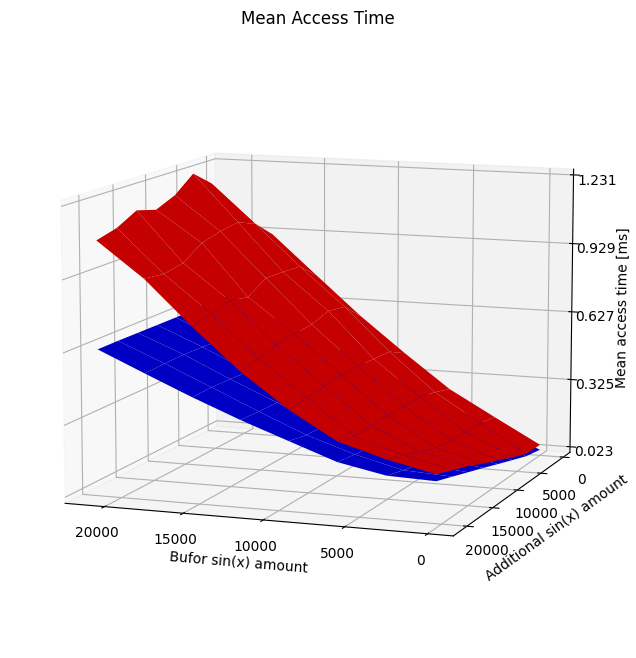

Locks: red, AO: blue, P/K amount: 2


In [5]:
draw_plot(df_lc, 
          df_ao,
          "Locks",
          "AO",
          2, 
          "Mean Access Time",
          "Bufor sin(x) amount",
          "Additional sin(x) amount",
          "Mean access time [ms]",
          "mean_access_time",
         10,110)
print(f"Locks: red, AO: blue, P/K amount: 2")

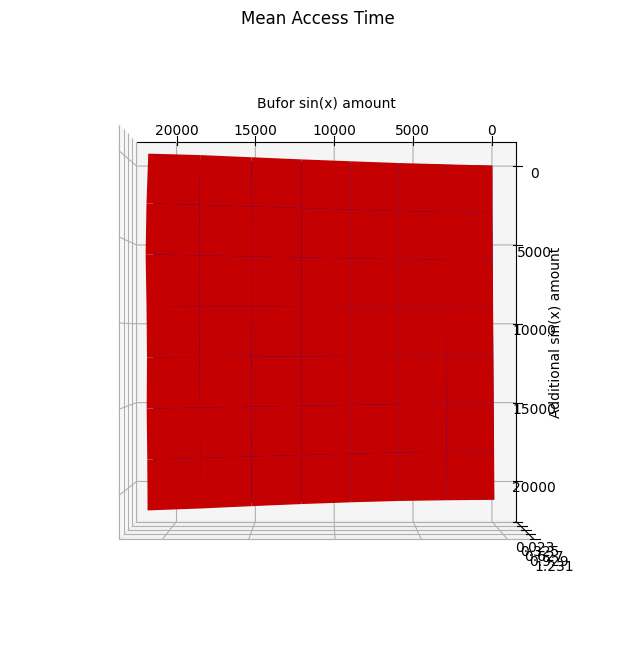

Locks: red, AO: blue, P/K amount: 2


In [6]:
draw_plot(df_lc, 
          df_ao,
          "Locks",
          "AO",
          2, 
          "Mean Access Time",
          "Bufor sin(x) amount",
          "Additional sin(x) amount",
          "",
          "mean_access_time",
         90,90)
print(f"Locks: red, AO: blue, P/K amount: 2")

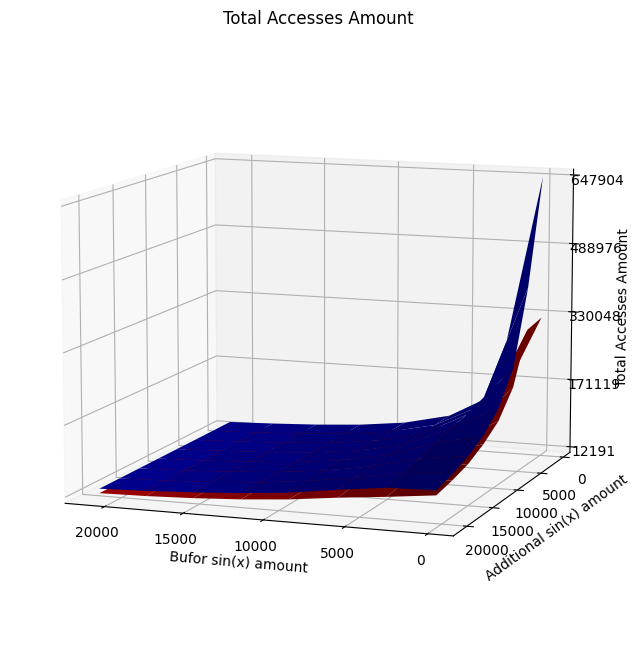

Locks: red, AO: blue, P/K amount: 2


In [7]:
draw_plot(df_lc, 
          df_ao,
          "Locks",
          "AO",
          2, 
          "Total Accesses Amount",
          "Bufor sin(x) amount",
          "Additional sin(x) amount",
          "Total Accesses Amount",
          "accesses_amount",
         10,110)
print(f"Locks: red, AO: blue, P/K amount: 2")

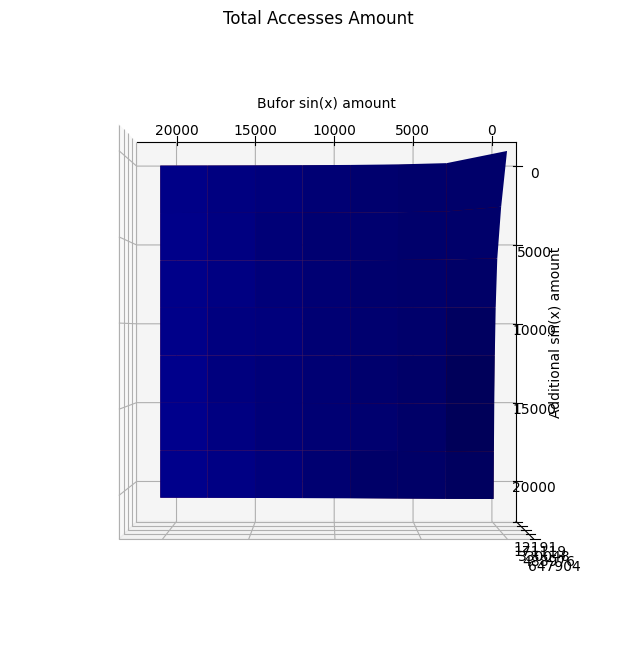

Locks: red, AO: blue, P/K amount: 2


In [8]:
draw_plot(df_lc, 
          df_ao,
          "Locks",
          "AO",
          2, 
          "Total Accesses Amount",
          "Bufor sin(x) amount",
          "Additional sin(x) amount",
          "",
          "accesses_amount",
         90,90)
print(f"Locks: red, AO: blue, P/K amount: 2")

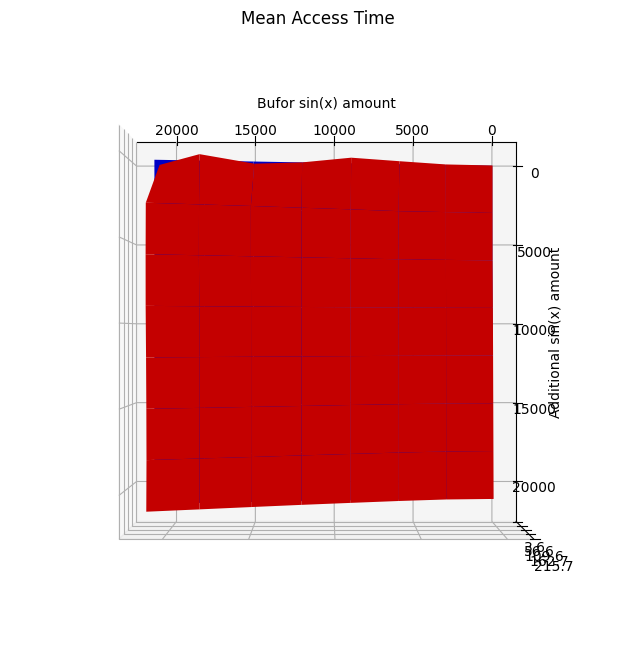

Locks: red, AO: blue, P/K amount: 300


In [9]:
draw_plot(df_lc, 
          df_ao,
          "Locks",
          "AO",
          300, 
          "Mean Access Time",
          "Bufor sin(x) amount",
          "Additional sin(x) amount",
          "",
          "mean_access_time",
         90,90)
print(f"Locks: red, AO: blue, P/K amount: 300")

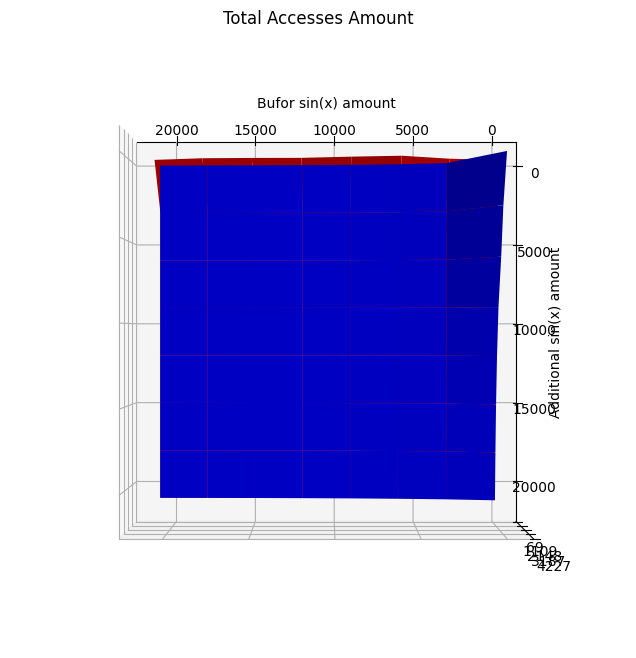

Locks: red, AO: blue, P/K amount: 300


In [10]:
draw_plot(df_lc, 
          df_ao,
          "Locks",
          "AO",
          300, 
          "Total Accesses Amount",
          "Bufor sin(x) amount",
          "Additional sin(x) amount",
          "",
          "accesses_amount",
         90,90)
print(f"Locks: red, AO: blue, P/K amount: 300")